<a href="https://www.kaggle.com/code/sjagkoo7/estes-park-weather-eda-am?scriptVersionId=132207010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-dataset/data.csv


#### Reference
- https://www.kaggle.com/questions-and-answers/172785
- https://www.kaggle.com/code/mastmustu/web-scrapping/notebook

#### Data Preprocessing

In [2]:
# Reading the data set
climate=pd.read_csv('/kaggle/input/climate-dataset/data.csv')
climate.head(5)

,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
0,1/01/2009,37.8,35,12.7,29.7,26.4,36.8,274,0.0,0.0,0.0,40.1,34.5,44,27,29.762,29.596,41.4,59.0,40.1
1,2/01/2009,43.2,32,14.7,29.5,12.8,18.0,240,0.0,0.0,0.0,52.8,37.5,43,16,29.669,29.268,35.7,51.0,52.8
2,3/01/2009,25.7,60,12.7,29.7,8.3,12.2,290,0.0,0.0,0.0,41.2,6.7,89,35,30.232,29.260,25.3,38.0,41.2
3,4/01/2009,9.3,67,0.1,30.4,2.9,4.5,47,0.0,0.0,0.0,19.4,-0.0,79,35,30.566,30.227,12.7,20.0,32.0
4,5/01/2009,23.5,30,-5.3,29.9,16.7,23.1,265,0.0,0.0,0.0,30.3,15.1,56,13,30.233,29.568,38.0,53.0,32.0


In [3]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       3280 non-null   object 
 1   Average temperature (°F)  3280 non-null   float64
 2   Average humidity (%)      3280 non-null   int64  
 3   Average dewpoint (°F)     3280 non-null   float64
 4   Average barometer (in)    3280 non-null   float64
 5   Average windspeed (mph)   3280 non-null   float64
 6   Average gustspeed (mph)   3280 non-null   float64
 7   Average direction (°deg)  3280 non-null   int64  
 8   Rainfall for month (in)   3280 non-null   float64
 9   Rainfall for year (in)    3280 non-null   float64
 10  Maximum rain per minute   3280 non-null   float64
 11  Maximum temperature (°F)  3280 non-null   float64
 12  Minimum temperature (°F)  3280 non-null   float64
 13  Maximum humidity (%)      3280 non-null   int64  
 14  Minimum 

In [4]:
climate.describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
count,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000
mean,45.162896,48.511585,23.350427,29.891616,5.759909,10.253537,212.144207,0.472439,5.748588,0.004713,58.115244,31.634573,74.604573,25.597866,30.059229,29.704018,20.059665,35.126921,58.717104
std,15.188165,17.495676,14.649178,0.252187,4.093984,15.226675,101.055441,0.633900,4.702936,0.013402,17.607809,14.032661,18.135878,15.413272,0.258119,0.481178,13.060875,41.846840,17.837418
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.100000,-27.700000,14.000000,0.000000,29.338000,13.266000,0.000000,0.000000,-6.100000
25%,34.500000,36.000000,12.300000,29.700000,2.600000,4.400000,109.750000,0.050000,0.980000,0.000000,44.600000,23.500000,64.000000,15.000000,29.880000,29.563750,13.800000,19.600000,44.600000
50%,45.900000,47.000000,22.900000,29.900000,4.600000,7.100000,253.000000,0.230000,5.470000,0.000000,58.300000,33.350000,81.000000,22.000000,30.031000,29.717000,18.400000,27.600000,58.300000
75%,58.100000,60.000000,35.700000,30.000000,8.000000,12.100000,282.000000,0.690000,9.750000,0.010000,73.500000,42.200000,89.000000,31.000000,30.219000,29.880000,24.200000,34.500000,77.400000
max,76.300000,92.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.260000,92.700000,64.000000,96.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.400000


In [5]:
climate.shape
#len(climate)

(3280, 20)

In [6]:
climate.isna().sum()

Day                         0
Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Maximum rain per minute     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
Maximum gust speed (mph)    0
Maximum heat index (°F)     0
dtype: int64

In [7]:
# Finding out the correlation between the features
corr=climate.corr()
corr.shape

(19, 19)

<AxesSubplot:>

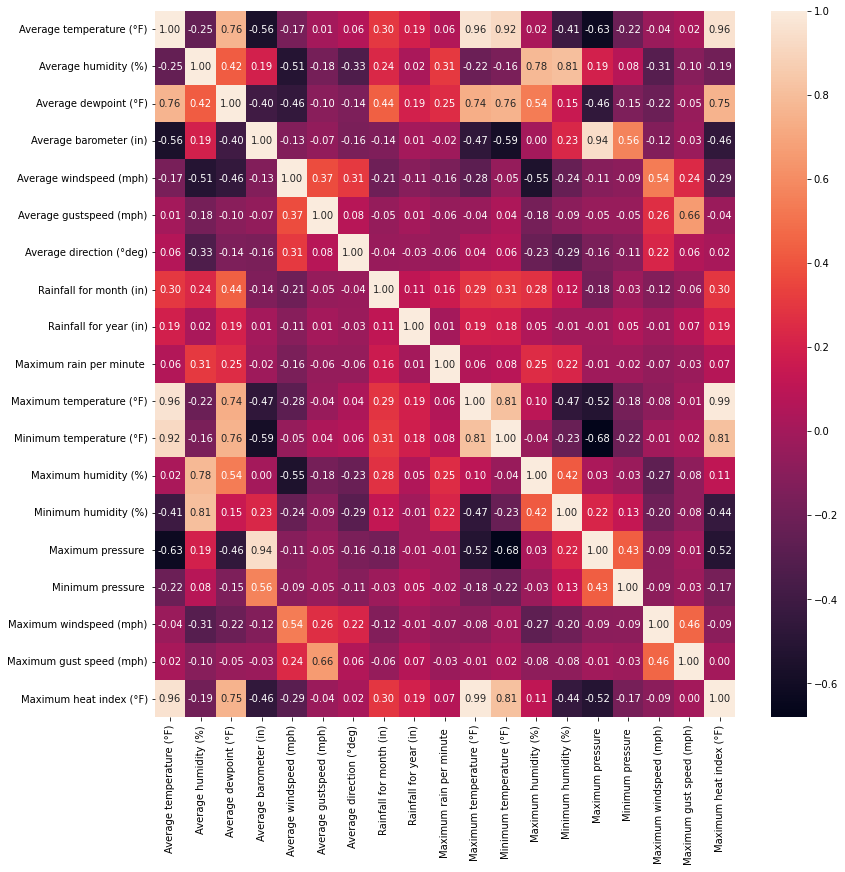

In [8]:
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True,fmt='.2f')

- Data looks good . So no data cleaning and Feature engoineering required

#### Practise Questions

- If answers are floating point numbers round of updo two floating point after the decimal
  - for example 10.546 should be read as 10.55, 10.544 as 10.54 and 10.1 as 10.10

#### Question 1. What is the standard deviation of maximum windspeed across all the days


In [9]:
max_windspd_std= climate['Maximum windspeed (mph)'].std()
print('max_windspd_std : ' , round(max_windspd_std,2))

max_windspd_std :  13.06


#### Question 2.What is the difference between 50th percentile and 75th percentile of average temperature.

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [10]:
#avg_50_75_diff = climate['Average temperature (°F)'].quantile(q=0.75)-climate['Average temperature (°F)'].quantile(q=0.5)
#avg_50_75_diff=climate.loc[:,'Average temperature (°F)'].quantile(q=0.75)-climate.loc[:,'Average temperature (°F)'].quantile(q=0.5)
avg_50_75_diff=climate.iloc[:,1].quantile(q=0.75)-climate.iloc[:,1].quantile(q=0.5)
print('avg_50_75_diff :', round(avg_50_75_diff,2))

avg_50_75_diff : 12.2


#### Question 3.What is the pearson's correlation between average dew point and average temperature.

In [11]:
####corr = round(climate.iloc[:,[1,3]].corr(method='pearson').iloc[0,1],2)
df1=climate[['Average dewpoint (°F)','Average temperature (°F)']]
df1=df1.corr()
prsn_corr= df1.iloc[0,1]
print("prsn_corr :",round(prsn_corr,2))

prsn_corr : 0.76


#### Question 4. Out of all the available records which month has the lowest average humidity (Assign your answer as month index, for example if its July index is 7)

http://net-informations.com/ds/pd/mcolumns.htm - Select two columns with conditional values

In [12]:
climate['Average humidity (%)'].min() # minimum value 9 
df2=climate[climate['Average humidity (%)']==9]
print("low_hum_mont = ",1)

low_hum_mont =  1


#### Question 5. Which month has the highest median for maximum_gust_speed out of all the available records.Also find the respective value( hint: group by month)

- https://www.programiz.com/python-programming/datetime/strptime
- https://www.programiz.com/python-programming/datetime/strftime

In [13]:
from datetime import datetime
climate['Date'] = [datetime.strptime(d,"%d/%m/%Y") for d in climate['Day']] # necessary to conver in datetime. pd.to_datetime directly won't provide correct answers.
climate['Date1']=pd.to_datetime(climate['Date']) # necessary to access month 
#climate.to_csv('compare.csv') # only to see wether Date is in according to Day colunm or not
climate['month']=climate.Date1.dt.month
hig_max_gst_spd = climate.groupby(['month'])['Maximum gust speed (mph)'].median().max()
hig_max_gst_spd_mont= climate.groupby(['month'])['Maximum gust speed (mph)'].median().idxmax()
print("hig_max_gst_spd : " , hig_max_gst_spd)
print("hig_max_gst_spd_mont : " , hig_max_gst_spd_mont)

hig_max_gst_spd :  34.5
hig_max_gst_spd_mont :  2


#### Question 6.Determine the average temperature between the months of March 2010 to May 2012 (including both the months)

In [14]:
df4 = climate[(climate['Date'] >= '2010-03-01') & (climate['Date'] <= '2012-05-31') ]
val= df4['Average temperature (°F)'].mean()
print('avg_temp_mar_may :' ,round(val,2) )

avg_temp_mar_may : 45.33


#### Question 7.Find the range of average temperature on Dec 2010

In [15]:
df5=climate[(climate['Date']>='2010-12-01') & (climate['Date']<='2010-12-31')]
range1= df5['Average temperature (°F)'].max()- df5['Average temperature (°F)'].min()
print("rang_avg_temp : ",round(range1,2))

rang_avg_temp :  44.8


#### Question 8. Out of all available records which day has the highest difference between maximum_pressure and minimum_pressure. (assign the date in string format as 'yyyy-mm-dd'. Make sure you enclose it with single quote)

In [16]:
climate['max_press_min_press_diff'] = climate['Maximum pressure '] - climate['Minimum pressure ']
climate.iloc[(climate['max_press_min_press_diff'].idxmax())].Day
print("max_press_min_press_diff : ", '2018-03-23')

max_press_min_press_diff :  2018-03-23


#### Question 9. How many days falls under median (i.e equal to median value) of barometer reading.

In [17]:
median_val= climate['Average barometer (in)'].median()
print("day_med_baro :",len(climate[climate['Average barometer (in)'] == median_val ]))

day_med_baro : 534


#### Question 10. Out of all the available records how many days are within one standard deviation of average temperature.

-  "Within one standard deviation of the mean" means within the interval [x¯−σ,x¯+σ]
-   x¯ - mean and σ - standard deviation

In [18]:
std_val = round(climate['Average temperature (°F)'].std(),2)
mean_val = round(climate['Average temperature (°F)'].mean(),2)
range_data = climate[(climate['Average temperature (°F)'] >= mean_val - std_val) & (climate['Average temperature (°F)'] <= mean_val + std_val) ]
print("avg_withn_val :",len(range_data))

avg_withn_val : 2092


In [19]:
climate.drop(columns = ['Date','Date1','month','max_press_min_press_diff'], inplace = True)
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       3280 non-null   object 
 1   Average temperature (°F)  3280 non-null   float64
 2   Average humidity (%)      3280 non-null   int64  
 3   Average dewpoint (°F)     3280 non-null   float64
 4   Average barometer (in)    3280 non-null   float64
 5   Average windspeed (mph)   3280 non-null   float64
 6   Average gustspeed (mph)   3280 non-null   float64
 7   Average direction (°deg)  3280 non-null   int64  
 8   Rainfall for month (in)   3280 non-null   float64
 9   Rainfall for year (in)    3280 non-null   float64
 10  Maximum rain per minute   3280 non-null   float64
 11  Maximum temperature (°F)  3280 non-null   float64
 12  Minimum temperature (°F)  3280 non-null   float64
 13  Maximum humidity (%)      3280 non-null   int64  
 14  Minimum 

#### Question 11. Draw a box plot on the average_temperature column across each year.
- use seaborn.boxplot()
- set the height and width to 8 and 15 repectively.
- assign the plot object to variable plot1.

Text(0.5, 0, 'Day')

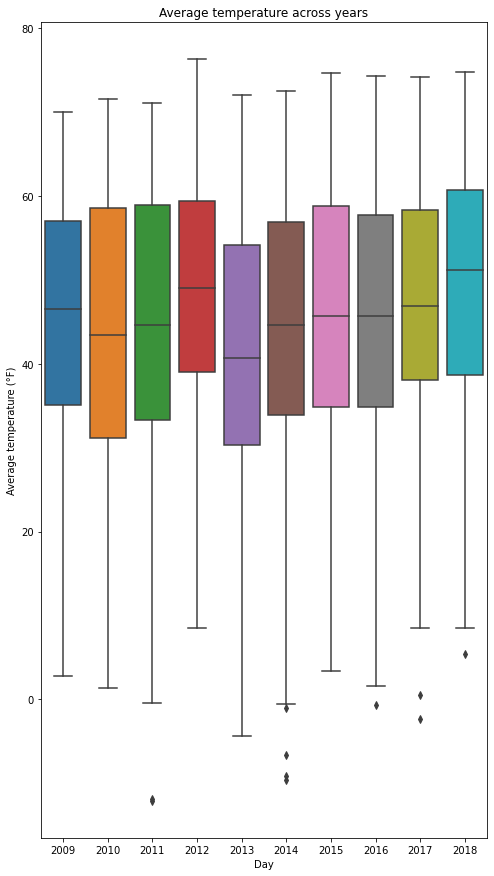

In [20]:
from datetime import datetime
climate['Date']= [datetime.strptime(d,'%d/%m/%Y') for d in climate['Day']]
climate['Date1'] = pd.to_datetime(climate['Date'])
plt.figure(figsize = (8,15))
plt.title('Average temperature across years')
sns.boxplot(x= climate.Date1.dt.year, y = climate['Average temperature (°F)'])
plt.xlabel('Day')

#### Question 12. Draw correlation heatmap for all the available features.
- set the height and width as 10 repectively.
- make sure the correlation values are annoted for each combination of features.
- assign the plot object to variable plot2

<AxesSubplot:title={'center':'Correlation'}>

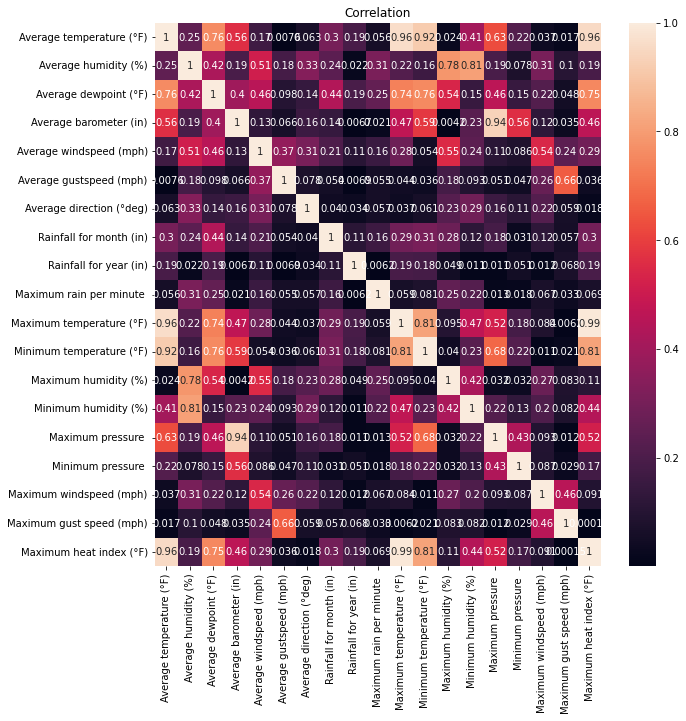

In [21]:
plt.figure(figsize=(10,10))
plt.title("Correlation")
sns.heatmap(climate.corr().abs(),annot=True)

#### Question 13. Draw a distribution plot using seaborn for average_temperature column.
- set bins to 20
- set the height and width to 8,8.
- assign the plot object to plot3 variable

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Average temperature distribution'}, xlabel='Average temperature (°F)', ylabel='Density'>

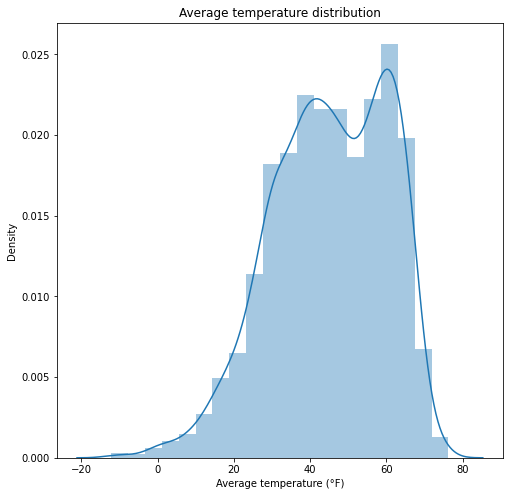

In [22]:
plt.figure(figsize=(8,8))
plt.title('Average temperature distribution')
sns.distplot(a= climate['Average temperature (°F)'],bins=20)

#### Question 14. Draw seaborn violin plot on mximum_pressure column.
- set gridsize to 100
- set figsize to 8,8
- assign the plot object to variable plot4

<AxesSubplot:title={'center':'Violin plot'}, xlabel='Maximum pressure '>

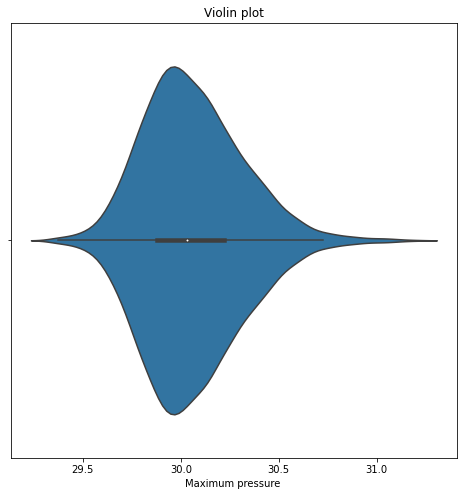

In [23]:
plt.figure(figsize = (8,8))
plt.title('Violin plot')
sns.violinplot(x=climate['Maximum pressure '],gridsize=100)